In [27]:
import pandas as pd
import re
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import os
import numpy as np

In [28]:
def when(x):   
    p = re.compile('(\d+)')
    delta = -int(p.findall(x)[0])
    if "초" in x:
        result = timedelta(seconds = delta)
        
    elif "분" in x:
        result = timedelta(minutes = delta)
        
    elif "시간" in x:
        result = timedelta(hours = delta)
     
    elif "일" in x:
        result = timedelta(days = delta)
        
    elif "달" in x:
        result = relativedelta(months = delta)
        
    elif "년" in x:
        result = relativedelta(years = delta)

    return the_datetime + result

In [29]:
# 폴더 내 리스트 뽑기 
folder_name = 'data_gu'
file_names = os.listdir(folder_name)
file_names

['carrot_list_강북구_선물세트_2021-09-29 101901.xlsx',
 'carrot_list_강북구_선물세트_2021-09-30 100752.xlsx',
 'carrot_list_강북구_선물세트_2021-10-01 101937.xlsx',
 'carrot_list_강북구_선물세트_2021-10-03 102959.xlsx',
 'carrot_list_강북구_선물세트_2021-10-04 102807.xlsx',
 'carrot_list_광진구_선물세트_2021-09-29 101453.xlsx',
 'carrot_list_광진구_선물세트_2021-09-30 100654.xlsx',
 'carrot_list_광진구_선물세트_2021-10-01 101533.xlsx',
 'carrot_list_광진구_선물세트_2021-10-03 102333.xlsx',
 'carrot_list_광진구_선물세트_2021-10-04 102359.xlsx',
 'carrot_list_도봉구_선물세트_2021-09-29 102004.xlsx',
 'carrot_list_도봉구_선물세트_2021-09-30 100910.xlsx',
 'carrot_list_도봉구_선물세트_2021-10-01 102040.xlsx',
 'carrot_list_도봉구_선물세트_2021-10-03 103135.xlsx',
 'carrot_list_도봉구_선물세트_2021-10-04 102909.xlsx',
 'carrot_list_동대문구_선물세트_2021-09-29 101556.xlsx',
 'carrot_list_동대문구_선물세트_2021-09-30 100349.xlsx',
 'carrot_list_동대문구_선물세트_2021-10-01 101635.xlsx',
 'carrot_list_동대문구_선물세트_2021-10-03 102509.xlsx',
 'carrot_list_동대문구_선물세트_2021-10-04 102502.xlsx',
 'carrot_list_성동구_선물세트_2021-09-29 1

In [30]:
file_name = file_names[0].split('_')
file_date = file_name[-1][:-5]
file_gu = file_name[2]
file_gu

year = int(file_date[0:4])
month = int(file_date[5:7])
day = int(file_date[8:10])
hour = int(file_date[11:13])
minute = int(file_date[13:15])
second = int(file_date[15:17])
file_date

'2021-09-29 101901'

In [16]:
# the_datetime : 수집 당시 datetime
# the_date : 변환 후에는 time이 필요없으므로 date만 추출 

# upload_datetime : (24시간 이전 매물에 사용) 수집 당시 datetime을 기준으로 추적한 업로드 datetime
# upload_date : (24시간 이후에 매물에 사용) 업로드 date만 추출 (24시간 이상 된 매물은 시간 추적이 안되므로)

# reup : 끌올여부 (끌올: 1 , no끌올: 0)
# region_gu : 구 추출 

total = pd.DataFrame()

for file_name in file_names:
    file_split = file_name.split('_')
    file_date = file_split[-1][:-5]

    year = int(file_date[0:4])
    month = int(file_date[5:7])
    day = int(file_date[8:10])
    hour = int(file_date[11:13])
    minute = int(file_date[13:15])
    second = int(file_date[15:17])
    
    the_datetime = datetime(year, month, day, hour, minute, second)
    
    df = pd.read_excel(f'./{folder_name}/'+file_name)
    
    df['the_datetime'] = the_datetime
    df['the_date'] = df['the_datetime'].dt.date
    
    df['upload_datetime'] = df['time'].apply(when)
    df['upload_date'] = df['upload_datetime'].dt.date
#     df['upload_ym'] = df['upload_datetime'].dt.strftime('%Y-%m') 
    df['region_gu'] = file_split[2]
    
    total = total.append(df)
    print(len(total))
    

total["reup"] = np.where(total['time'].str.contains("끌올"), 1, 0)
total = total.reset_index(drop = False)

242
483
725
964
1195
1427
1667
1907
2147
2386
2622
2865
3108
3346
3590
3833
4070
4313
4554
4794
5035
5272
5514
5752
5990
6230
6470
6701
6945
7187
7425
7659
7898
8136
8372
8612
8852
9091
9328
9566
9808
10052
10295
10533
10774
11015
11257
11497
11740
11982


In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11982 entries, 0 to 11981
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            11982 non-null  int64         
 1   num              11982 non-null  int64         
 2   region           11982 non-null  object        
 3   title            11982 non-null  object        
 4   category         11982 non-null  object        
 5   time             11982 non-null  object        
 6   price            11982 non-null  int64         
 7   detail           11972 non-null  object        
 8   interest         11982 non-null  int64         
 9   chat             11982 non-null  int64         
 10  view             11982 non-null  int64         
 11  the_datetime     11982 non-null  datetime64[ns]
 12  the_date         11982 non-null  object        
 13  upload_datetime  11982 non-null  datetime64[ns]
 14  upload_date      11982 non-null  objec

In [17]:
total.isnull().sum()

index               0
num                 0
region              0
title               0
category            0
time                0
price               0
detail             10
interest            0
chat                0
view                0
the_datetime        0
the_date            0
upload_datetime     0
upload_date         0
region_gu           0
reup                0
dtype: int64

In [18]:
total.head()

,index,num,region,title,category,time,price,detail,interest,chat,view,the_datetime,the_date,upload_datetime,upload_date,region_gu,reup
0,0,285844083,강북구 미아동,인삼수삼 선물세트,생활/가공식품,16일 전,20000,지인에게서 선물 받았는데\n제가 열이 많아 내놓습니다.\n현재 냉장 보관중입니다.\...,0,5,276,2021-09-29 10:19:01,2021-09-29,2021-09-13 10:19:01,2021-09-13,강북구,0
1,1,288832747,강북구 미아동,스팸클래식 1호 선물세트,생활/가공식품,8일 전,40000,추석 선물세트 쇼핑백 있어요~,1,2,503,2021-09-29 10:19:01,2021-09-29,2021-09-21 10:19:01,2021-09-21,강북구,0
2,2,282622237,강북구 미아동,[미개봉 새상품]사조 해표 선물세트 / 안심특선 s17호,생활/가공식품,끌올 15일 전,30000,사조 해표 선물세트 / 안심특선 s17호\n선물 같은것 많이 받아서 저렴하게 판매합...,2,1,191,2021-09-29 10:19:01,2021-09-29,2021-09-14 10:19:01,2021-09-14,강북구,1
3,3,285022427,강북구 수유2동,CJ추석선물세트 G호,생활/가공식품,17일 전,25000,추석선물세트 G호구성입니다! \n인터넷 최저 가격보다 저렴하게 올립니다~,0,1,193,2021-09-29 10:19:01,2021-09-29,2021-09-12 10:19:01,2021-09-12,강북구,0
4,4,221680480,강북구 수유2동,레이져 블랙샤크V2 헤드셋,게임/취미,끌올 18시간 전,80000,선물 받아서 테스트만 해봤습니다.\n기스 1도없고 풀세트 입니다,3,3,170,2021-09-29 10:19:01,2021-09-29,2021-09-28 16:19:01,2021-09-28,강북구,1


In [5]:
# 수집 날짜 기준 가격 추적 
total.pivot(index='num', columns='the_date', values='price').fillna(0).head(20)

the_date,2021-09-29,2021-09-30,2021-10-01,2021-10-03,2021-10-04
num,,,,,
127482010,30000.0,30000.0,30000.0,30000.0,30000.0
127920313,40000.0,40000.0,40000.0,40000.0,40000.0
136926347,0.0,0.0,0.0,23000.0,23000.0
137579805,40000.0,40000.0,40000.0,40000.0,40000.0
146581106,0.0,0.0,40000.0,40000.0,40000.0
152041671,70000.0,70000.0,70000.0,0.0,0.0
153885185,7000.0,7000.0,7000.0,7000.0,7000.0
159969982,20000.0,20000.0,20000.0,20000.0,20000.0
162014732,0.0,12000.0,12000.0,12000.0,12000.0


In [6]:
# 수집 날짜 기준 조회수 추적 
total.pivot(index='num', columns='the_date', values='view').fillna(0).head(20)

the_date,2021-09-29,2021-09-30,2021-10-01,2021-10-03,2021-10-04
num,,,,,
127482010,886.0,895.0,899.0,909.0,911.0
127920313,223.0,224.0,224.0,224.0,227.0
136926347,0.0,0.0,0.0,217.0,224.0
137579805,209.0,213.0,214.0,214.0,216.0
146581106,0.0,0.0,940.0,950.0,953.0
152041671,870.0,870.0,870.0,0.0,0.0
153885185,354.0,355.0,356.0,360.0,361.0
159969982,216.0,216.0,219.0,220.0,223.0
162014732,0.0,531.0,535.0,571.0,590.0


In [8]:
# 24시간 내 매물만 봤을 때 
in24hours = total[total.time.str.contains("초|분|시간")]

<AxesSubplot:xlabel='upload_datetime'>

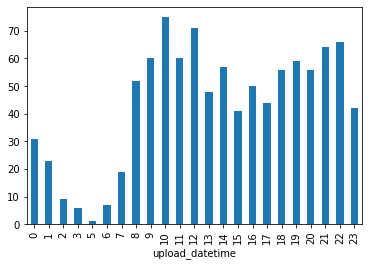

In [9]:
# 24시간 내 시간대별 물량 
in24hours.groupby(in24hours.upload_datetime.dt.hour).title.count().plot.bar()

<AxesSubplot:xlabel='upload_datetime'>

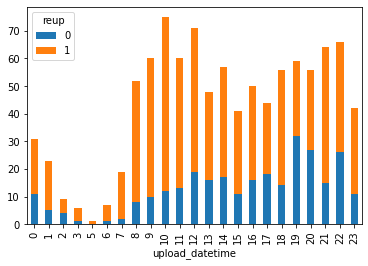

In [10]:
# 24 시간 내 물량 중에서 끌올의 비율 
in24hours.groupby([in24hours.upload_datetime.dt.hour, 'reup']).title.count().unstack().plot(kind='bar', stacked=True)